<a href="https://colab.research.google.com/github/Leetora41053/sesac_practice/blob/main/9_knn_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0. 0. 0. 0. 0.]
테스트 데이터는 0 클래스로 분류됩니다.


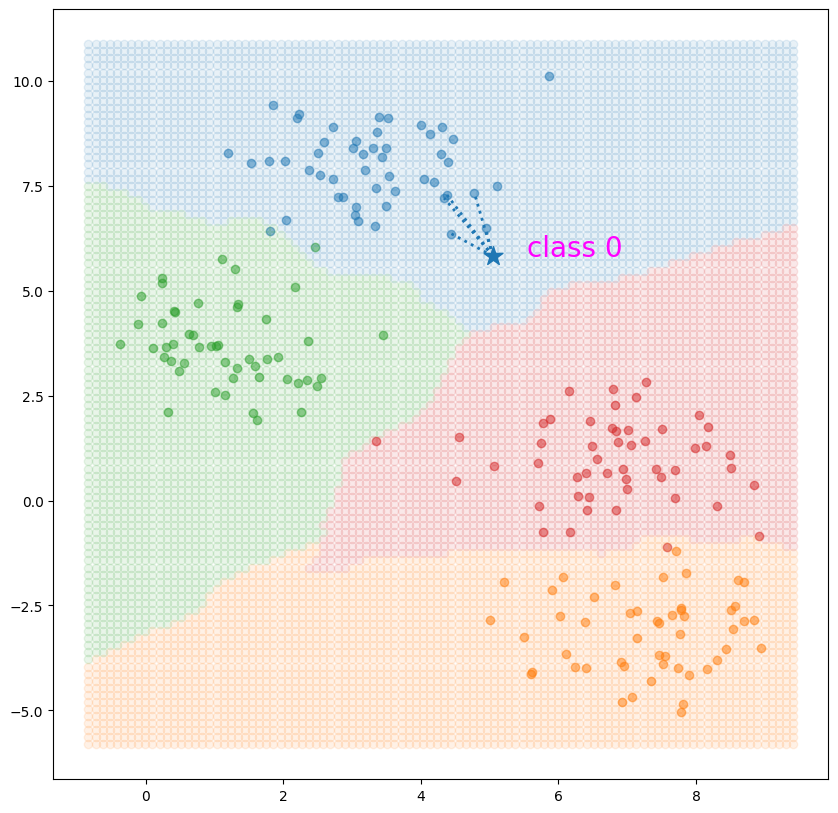

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 하이퍼파라미터 설정
K = 5  # K-Nearest Neighbors에서 사용할 이웃의 수
n_classes = 4  # 클래스 수
n_data = 50  # 각 클래스당 생성할 데이터 포인트 수

# 데이터 생성
X, y = [], []  # X는 데이터 포인트, y는 해당 데이터 포인트의 클래스 레이블
for class_idx in range(n_classes):
    # 각 클래스의 중심(centroid)을 무작위로 생성
    centroid = np.random.uniform(low=-10, high=10, size=(2,))

    # 중심 주변에 정규 분포를 따르는 데이터 포인트를 생성
    X_ = np.random.normal(loc=centroid, scale=1, size=(n_data, 2))

    # 모든 데이터 포인트에 대해 클래스 레이블을 설정
    y_ = np.ones(n_data,) * class_idx

    X.append(X_)
    y.append(y_)

# 데이터를 하나의 배열로 합치기
X = np.vstack(X)
y = np.concatenate(y)

# 테스트 데이터 생성
test_data = np.random.uniform(low=-10, high=10, size=(2,))

# 모든 데이터 포인트와 테스트 데이터 사이의 유클리드 거리 계산
e_dists = np.sqrt(np.sum((X - test_data)**2, axis=1))

# 거리를 기반으로 가장 가까운 K개의 이웃 데이터 포인트 선택
k_nearest_indices = np.argsort(e_dists)[:K]
k_nearest_data = X[k_nearest_indices]
k_nearest_y = y[k_nearest_indices]

# 가장 가까운 이웃 데이터 포인트의 클래스 레이블 출력
print(k_nearest_y)

# 가장 가까운 이웃 데이터를 기반으로 테스트 데이터의 클래스 레이블 예측
uniques, cnts = np.unique(k_nearest_y, return_counts=True)
pred = int(uniques[np.argmax(cnts)])
print(f"테스트 데이터는 {pred} 클래스로 분류됩니다.")

# 시각화 준비
fig, ax = plt.subplots(figsize=(10, 10))

# 각 클래스의 데이터 포인트를 산점도로 표시
for class_idx in range(n_classes):
    X_ = X[y == class_idx]
    ax.scatter(X_[:, 0], X_[:, 1], alpha=0.5)

# 테스트 데이터를 별표로 표시
ax.scatter(test_data[0], test_data[1], color=f'C{pred}', s=200, marker="*")

# 테스트 데이터와 가장 가까운 이웃 데이터를 점선으로 연결
for data, y_ in zip(k_nearest_data, k_nearest_y):
    ax.plot([test_data[0], data[0]], [test_data[1], data[1], ], ls=':', lw=2,
            color=f'C{int(y_)}')

# 테스트 데이터의 예측된 클래스 레이블을 출력
ax.text(test_data[0] + 0.5, test_data[1], f"class {pred}", color='fuchsia', fontsize=20)

# 결정 경계(Decision Boundary) 시각화
x1_lim, x2_lim = ax.get_xlim(), ax.get_ylim()
x1 = np.linspace(x1_lim[0], x1_lim[1], 100)
x2 = np.linspace(x2_lim[0], x2_lim[1], 100)

X1, X2 = np.meshgrid(x1, x2)
X_db = np.hstack([X1.reshape(-1, 1), X2.reshape(-1, 1)])

# 결정 경계 예측
preds = []
for x_db in X_db:
    distances = np.sum((X - x_db) ** 2, axis=1)
    distances_argsort = np.argsort(distances)
    close_K_indices = distances_argsort[:K]
    close_classes = y[close_K_indices]
    unique, cnts = np.unique(close_classes, return_counts=True)
    pred = unique[np.argmax(cnts)]
    preds.append(pred)

# 예측된 클래스에 따라 결정 경계를 투명하게 표시
preds = np.array(preds)
for class_idx in range(n_classes):
    X_ = X_db[preds == class_idx]
    ax.scatter(X_[:, 0], X_[:, 1], color=f'C{class_idx}', alpha=0.1)

# 결과를 시각화
plt.show()
